<a href="https://colab.research.google.com/github/harshvardhan981/ML/blob/main/upper_confidence_bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing the dataset

In [48]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')


## Implementing UCB

In [49]:
N=500
d=10
ads_selected = []
total_reward = 0
no_of_selections =[0]*d
sums_of_rewards = [0]*d
total_reward=0
for n in range(0,N):
  ad=0;
  max_upper_bound = 0
  for i in range(0,d):
    if no_of_selections[i]>0:
      average_reward=sums_of_rewards[i]/no_of_selections[i]
      delta_i=math.sqrt(3/2*(math.log(n+1)/no_of_selections[i]))
      upper_bound=average_reward+delta_i
    else:
       upper_bound=1e400
    if upper_bound>max_upper_bound:
      max_upper_bound=upper_bound
      ad=i
  ads_selected.append(ad)
  no_of_selections[ad]=no_of_selections[ad]+1
  reward=dataset.values[n,ad]
  sums_of_rewards[ad]=sums_of_rewards[ad]+ reward
  total_reward=total_reward+reward


## Visualising the results

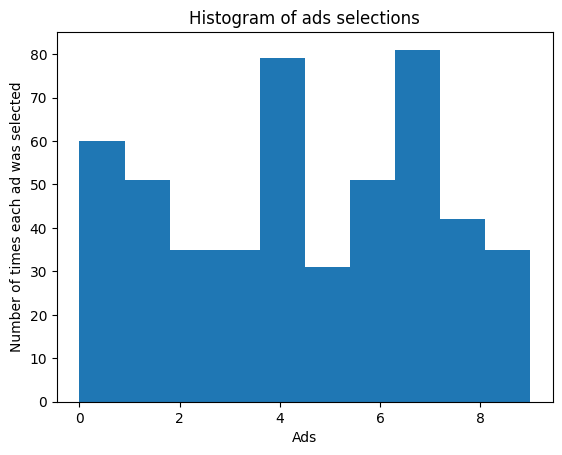

In [50]:
plt.hist(ads_selected)
plt.title("Histogram of ads selections")
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()